# 02 - Data Cleaning & Exploration (All Datasets)

**Goal:** Clean the text data and explore all 3 datasets.

**What we'll do:**
1. Clean the IMDB reviews (remove HTML, lowercase, remove special characters)
2. Load and explore the Amazon reviews
3. Load and explore the Yelp reviews
4. Combine and prepare for modeling

---
## Part 1: Setup

**YOUR TASK:** Import the libraries we need.

You need:
- `pandas` (as pd)
- `re` (Python's built-in library for text patterns — called Regular Expressions)
- `matplotlib.pyplot` (as plt) — for charts
- `seaborn` (as sns) — for nicer charts

Write the import statements yourself.

In [1]:
# YOUR CODE: Import the 4 libraries listed above
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns



---
## Part 2: Load and Clean IMDB Dataset

### Step 1: Load the data

**YOUR TASK:** Load the IMDB dataset using a relative path.

Since this notebook is in `notebooks/`, and the data is in `data/raw/`,
the relative path is: `../data/raw/IMDB Dataset.csv`

Remember: `..` means "go up one folder"

In [2]:
# YOUR CODE: Load the IMDB dataset and show the first 5 rows
imdb_data = pd.read_csv(r"C:\Users\ogaga\OneDrive\Desktop\Everything AI and ML\sentiment-analysis-project\data\raw\IMDB Dataset.csv")
# show any HTML tags in the reviews
imdb_data['review'].str.contains('<.*?>', regex=True).sum()





29202

### Step 2: Look at a raw review

**YOUR TASK:** Print the full text of the first review.

Look carefully — do you see any HTML tags like `<br />` or special characters?

In [3]:
# YOUR CODE: Print the first review (full text, don't limit to 500 characters)

imdb_data['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

### Step 3: Build a cleaning function

We need a function that takes a raw review and returns a clean version.

**What the function should do (in order):**
1. Convert to lowercase
2. Remove HTML tags (like `<br />`)
3. Remove special characters and numbers (keep only letters and spaces)
4. Remove extra whitespace

**NEW CONCEPT: `re` (Regular Expressions)**

Regular expressions are patterns for finding/replacing text:
- `re.sub('<.*?>', '', text)` — finds anything between `< >` and removes it
- `re.sub('[^a-z\s]', '', text)` — removes everything that's NOT a letter or space
- `re.sub('\s+', ' ', text)` — replaces multiple spaces with one space

**YOUR TASK:** Complete the function below.

In [4]:
def clean_text(text): 
    # YOUR CODE: Write the 4 steps here
    # Each step should update the 'text' variable
    # Example: text = text.lower()
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

### Step 4: Test your cleaning function

**YOUR TASK:** Test the function on a sample review to make sure it works.

In [5]:
# Test with a sample that has known issues
sample = "This is a <br />GREAT movie!!! I'd rate it 10/10 & recommend to ALL."

print("BEFORE cleaning:")
print(sample)
print("\nAFTER cleaning:")
print(clean_text(sample))

# Expected output: "this is a great movie id rate it and recommend to all"

BEFORE cleaning:
This is a <br />GREAT movie!!! I'd rate it 10/10 & recommend to ALL.

AFTER cleaning:
this is a great movie id rate it recommend to all


### Step 5: Apply cleaning to ALL reviews

**YOUR TASK:** Use `.apply()` to run `clean_text` on every review.

Create a new column called `clean_review`.

In [6]:
# YOUR CODE: Apply clean_text to the 'review' column
# Store result in a new column called 'clean_review'
# Hint: imdb_data['clean_review'] = imdb_data['review'].apply(???)
imdb_data['clean_review'] = imdb_data['review'].apply(clean_text)

# Show the first few rows to compare raw vs clean
imdb_data[['review', 'clean_review']].head(50)

,review,clean_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...
5,"Probably my all-time favorite movie, a story o...",probably my alltime favorite movie a story of ...
6,I sure would like to see a resurrection of a u...,i sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",this show was an amazing fresh innovative idea...
8,Encouraged by the positive comments about this...,encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,if you like original gut wrenching laughter yo...


### Step 6: Compare before and after

**YOUR TASK:** Print the first review before and after cleaning side by side.

In [7]:
# YOUR CODE: Print the first row's 'review' and 'clean_review'
# Use iloc[0] to get the first row

print("=== RAW REVIEW ===")
# YOUR CODE here

print("\n=== CLEAN REVIEW ===")
# YOUR CODE here


=== RAW REVIEW ===

=== CLEAN REVIEW ===


---
## Part 3: Load and Explore Amazon Dataset

The Amazon data is in a different format: **compressed text files** (.bz2)

Each line looks like:
```
__label__2 Great product, works perfectly!
__label__1 Terrible quality, broke after one day.
```

Where:
- `__label__2` = positive (rating 4-5 stars)
- `__label__1` = negative (rating 1-2 stars)

**I'll give you the loading code since this format is tricky.**

In [8]:
import bz2

def load_amazon_data(file_path, num_samples=100000):
    """
    Loads Amazon reviews from a .bz2 compressed file.
    
    Each line has format: __label__X review text here
    __label__1 = negative, __label__2 = positive
    
    num_samples: how many reviews to load (the full file has millions)
    """
    reviews = []
    sentiments = []
    
    with bz2.open(file_path, 'rt', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= num_samples:
                break
            
            # Split the label from the review text
            label = line[:11]  # '__label__X ' is always 11 characters
            review = line[11:].strip()
            
            # Convert label to 'positive' or 'negative'
            sentiment = 'positive' if label.startswith('__label__2') else 'negative'
            
            reviews.append(review)
            sentiments.append(sentiment)
    
    return pd.DataFrame({'review': reviews, 'sentiment': sentiments})


# Load 50,000 reviews from the training file
amazon_df = load_amazon_data('../data/raw/train.ft.txt.bz2', num_samples=100000)

print(f"Amazon dataset loaded: {len(amazon_df)} reviews")
print(f"\nShape: {amazon_df.shape}")

Amazon dataset loaded: 100000 reviews

Shape: (100000, 2)


### Explore the Amazon data

**YOUR TASK:** Do the same exploration you did for IMDB:
1. Show first 5 rows
2. Check sentiment distribution (counts and percentages)
3. Look at a positive and negative review example
4. Check review lengths

In [9]:
# YOUR CODE: Show first 5 rows
print(amazon_df.head(10))



                                              review sentiment
0  Stuning even for the non-gamer: This sound tra...  positive
1  The best soundtrack ever to anything.: I'm rea...  positive
2  Amazing!: This soundtrack is my favorite music...  positive
3  Excellent Soundtrack: I truly like this soundt...  positive
4  Remember, Pull Your Jaw Off The Floor After He...  positive
5  an absolute masterpiece: I am quite sure any o...  positive
6  Buyer beware: This is a self-published book, a...  negative
7  Glorious story: I loved Whisper of the wicked ...  positive
8  A FIVE STAR BOOK: I just finished reading Whis...  positive
9  Whispers of the Wicked Saints: This was a easy...  positive


In [10]:
# YOUR CODE: Sentiment distribution (counts + percentages)
print(amazon_df['sentiment'].value_counts())


sentiment
positive    51267
negative    48733
Name: count, dtype: int64


In [21]:
# YOUR CODE: Show one positive and one negative review example
print("\n=== POSITIVE REVIEW EXAMPLE ===")
print(amazon_df[amazon_df['sentiment'] == 'positive'].iloc[0]['review'])
print("\n=== NEGATIVE REVIEW EXAMPLE ===")
print(amazon_df[amazon_df['sentiment'] == 'negative'].iloc[0]['review'])



=== POSITIVE REVIEW EXAMPLE ===
Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^

=== NEGATIVE REVIEW EXAMPLE ===
Buyer beware: This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon's family and friends--or perhaps, by herself! I can't imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a "worst book" contest. I can't believe Amazon even sells this kind of thing

In [22]:
# YOUR CODE: Check review lengths (create review_length column, then describe)
print("\nReview Lengths Statistics:")
amazon_df['review_length'] = amazon_df['review'].apply(len)
print(amazon_df['review_length'].describe())



Review Lengths Statistics:
count    100000.00000
mean        439.53839
std         240.44770
min         101.00000
25%         236.00000
50%         393.00000
75%         608.00000
max        1015.00000
Name: review_length, dtype: float64


### Clean the Amazon reviews

**YOUR TASK:** Apply the same `clean_text` function to Amazon reviews.

In [23]:
# YOUR CODE: Apply clean_text to amazon_df and create 'clean_review' column
amazon_df['clean_review'] = amazon_df['review'].apply(clean_text)

# Show the first few rows to compare raw vs clean
amazon_df[['review', 'clean_review']].head(50)

,review,clean_review
0,Stuning even for the non-gamer: This sound tra...,stuning even for the nongamer this sound track...
1,The best soundtrack ever to anything.: I'm rea...,the best soundtrack ever to anything im readin...
2,Amazing!: This soundtrack is my favorite music...,amazing this soundtrack is my favorite music o...
3,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack i truly like this soundtr...
4,"Remember, Pull Your Jaw Off The Floor After He...",remember pull your jaw off the floor after hea...
5,an absolute masterpiece: I am quite sure any o...,an absolute masterpiece i am quite sure any of...
6,"Buyer beware: This is a self-published book, a...",buyer beware this is a selfpublished book and ...
7,Glorious story: I loved Whisper of the wicked ...,glorious story i loved whisper of the wicked s...
8,A FIVE STAR BOOK: I just finished reading Whis...,a five star book i just finished reading whisp...
9,Whispers of the Wicked Saints: This was a easy...,whispers of the wicked saints this was a easy ...


---
## Part 4: Load and Explore Yelp Dataset

The Yelp data is in **JSON format** (one JSON object per line).

It has star ratings (1-5), so we need to convert:
- Stars 1-2 = negative
- Stars 4-5 = positive
- Stars 3 = neutral (we'll drop these to keep it binary)

**I'll give you the loading code since JSON format is new.**

In [24]:
# Load Yelp reviews (JSON format, one object per line)
# We only load 100,000 to keep things manageable

yelp_df = pd.read_json('../data/raw/yelp_academic_dataset_review.json', lines=True, nrows=100000)

print(f"Yelp dataset loaded: {len(yelp_df)} reviews")
print(f"Columns: {yelp_df.columns.tolist()}")

Yelp dataset loaded: 100000 reviews
Columns: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


In [25]:
# Show first 5 rows to see what columns we have
yelp_df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [16]:
# Check the star rating distribution
print("Star rating distribution:")
print(yelp_df['stars'].value_counts().sort_index())

Star rating distribution:
stars
1     5379
2     4003
3     5677
4    12721
5    22220
Name: count, dtype: int64


### Convert stars to sentiment labels

**YOUR TASK:** Create a new column called `sentiment`:
- Stars 1-2 → 'negative'
- Stars 4-5 → 'positive'
- Stars 3 → drop these rows

**NEW CONCEPT: `.map()` with a dictionary**

```python
# Example: mapping numbers to labels
star_mapping = {1: 'negative', 2: 'negative', 4: 'positive', 5: 'positive'}
df['sentiment'] = df['stars'].map(star_mapping)
```

After mapping, rows with star=3 will have `NaN` (missing value).
Use `.dropna()` to remove them.

In [26]:
# YOUR CODE:
# 1. Create the star_mapping dictionary
star_mapping = {
    1: 'negative',
    2: 'negative',
    3: None,        # Neutral, will be dropped
    4: 'positive',
    5: 'positive'
}
# 2. Map stars to sentiment
yelp_df['sentiment'] = yelp_df['stars'].map(star_mapping)
# 3. Drop rows where sentiment is NaN (star rating = 3)
yelp_df = yelp_df.dropna(subset=['sentiment'])
# 4. Print the new sentiment distribution
print("\nYelp sentiment distribution after mapping:")
print(yelp_df['sentiment'].value_counts())




Yelp sentiment distribution after mapping:
sentiment
positive    69729
negative    18909
Name: count, dtype: int64


### Explore and clean Yelp reviews

**YOUR TASK:** Same as before:
1. Look at positive and negative examples
2. Check review lengths
3. Apply `clean_text` function

In [28]:
# YOUR CODE: Explore and clean Yelp reviews
print("\n=== POSITIVE REVIEW EXAMPLE ===")
print(yelp_df[yelp_df['sentiment'] == 'positive'].iloc[0]['text'])
print("\n=== NEGATIVE REVIEW EXAMPLE ===")
print(yelp_df[yelp_df['sentiment'] == 'negative'].iloc[0]['text'])  
print("\n=== CLEANED POSITIVE REVIEW EXAMPLE ===")
yelp_df['clean_review'] = yelp_df['text'].apply(clean_text)
print(yelp_df['clean_review'].head(100))



=== POSITIVE REVIEW EXAMPLE ===
I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.

For anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).

There is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!

=== NEGATIVE REVIEW EXAMPLE ===
I am a long term frequent customer of this establishment. I just went in to order take out (3 apps) and 

---
## Part 5: Combine All Datasets

Now we combine all 3 cleaned datasets into one.

**NEW CONCEPT: `pd.concat()`**

This stacks DataFrames on top of each other (like copying rows from 3 spreadsheets into one).

**YOUR TASK:**
1. From each dataset, keep only `clean_review` and `sentiment` columns
2. Add a `source` column so we know where each review came from
3. Combine into one DataFrame

In [30]:
# Step 1: Add a 'source' column to each dataset
imdb_data['source'] = 'imdb'
amazon_df['source'] = 'amazon'
yelp_df['source'] = 'yelp'

# Step 2: Keep only the columns we need from each
imdb_clean = imdb_data[['clean_review', 'sentiment', 'source']]
amazon_clean = amazon_df[['clean_review', 'sentiment', 'source']]
yelp_clean = yelp_df[['clean_review', 'sentiment', 'source']]

# YOUR CODE: Combine all 3 using pd.concat()
# combined_df = pd.concat([...], ignore_index=True)
combined_data = pd.concat([imdb_clean, amazon_clean, yelp_clean], ignore_index=True)


# YOUR CODE: Print the shape and check sentiment distribution of combined data
print("Shape of combined dataset:", combined_data.shape)
print("\nSentiment distribution:")
print(combined_data['sentiment'].value_counts())

Shape of combined dataset: (238638, 3)

Sentiment distribution:
sentiment
positive    145996
negative     92642
Name: count, dtype: int64


In [31]:
# Check how many reviews came from each source
# YOUR CODE: Use value_counts() on the 'source' column
print(combined_data['source'].value_counts())


source
amazon    100000
yelp       88638
imdb       50000
Name: count, dtype: int64


---
## Part 6: Visualize the Data

Let's create some charts for our portfolio.

**YOUR TASK:** Create the visualizations below.

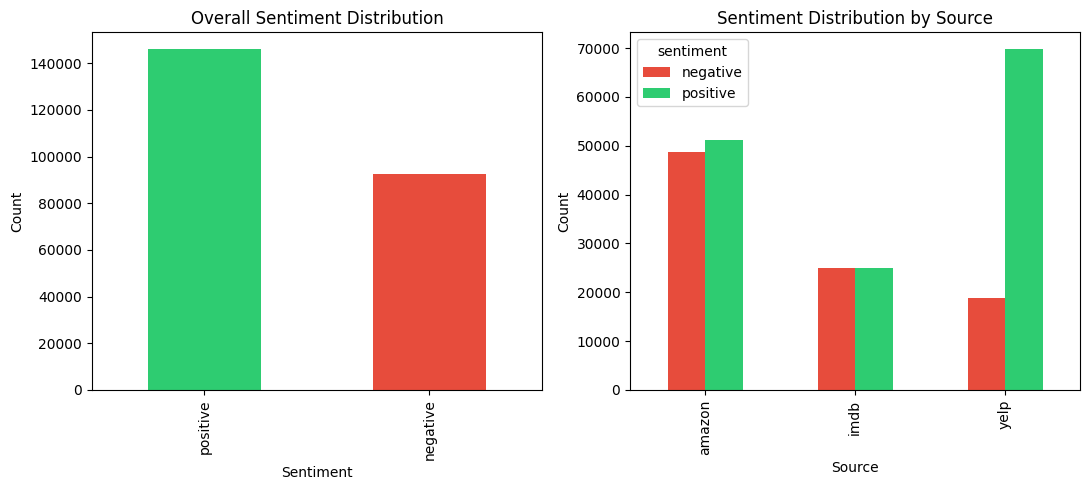

Chart saved to data/processed/sentiment_distribution.png


In [37]:
# Visualization 1: Sentiment distribution across all data
# This code is provided — run it and observe

fig, axes = plt.subplots(1, 2, figsize=(11, 5))

# Left plot: Count of positive vs negative
combined_data['sentiment'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Overall Sentiment Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Right plot: Distribution by source
pd.crosstab(combined_data['source'], combined_data['sentiment']).plot(kind='bar', ax=axes[1], color=['#e74c3c', '#2ecc71'])
axes[1].set_title('Sentiment Distribution by Source')
axes[1].set_xlabel('Source')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('../data/processed/sentiment_distribution.png', dpi=150)
plt.show()

print("Chart saved to data/processed/sentiment_distribution.png")

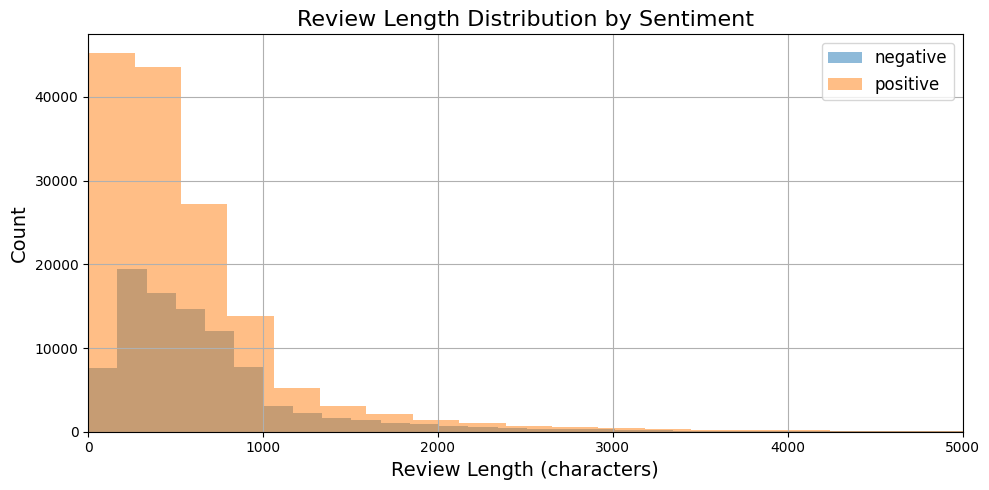

Chart saved to data/processed/review_length_distribution.png


In [41]:
# Visualization 2: Review length distribution
# This code is provided — run it and observe

from tkinter import font


combined_data['review_length'] = combined_data['clean_review'].apply(len)

fig, ax = plt.subplots(figsize=(10, 5))
combined_data.groupby('sentiment')['review_length'].hist(alpha=0.5, bins=50, ax=ax, label=['negative', 'positive'])
ax.set_xlim(0, 5000)
ax.set_title('Review Length Distribution by Sentiment', fontsize=16)
ax.set_xlabel('Review Length (characters)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(['negative', 'positive'], fontsize=12)
plt.tight_layout()
plt.savefig('../data/processed/review_length_distribution.png', dpi=150)
plt.show()

print("Chart saved to data/processed/review_length_distribution.png")

---
## Part 7: Save the Cleaned Data

Save the combined, cleaned dataset so we can use it for modeling.

**YOUR TASK:** Save the combined DataFrame to CSV.

In [42]:
# Save to processed folder
# YOUR CODE: Use combined_df.to_csv() to save
# Path: '../data/processed/combined_reviews_clean.csv'
# Add index=False so it doesn't save row numbers
combined_data.to_csv('../data/processed/combined_reviews_clean.csv', index=False)

print(f"Saved {len(combined_data)} cleaned reviews to data/processed/combined_reviews_clean.csv")

Saved 238638 cleaned reviews to data/processed/combined_reviews_clean.csv


---
## Summary: What Did We Learn?

Fill this in:

1. **Total combined reviews:** _____
2. **From IMDB:** _____ reviews
3. **From Amazon:** _____ reviews
4. **From Yelp:** _____ reviews
5. **Overall balance:** ___% positive, ___% negative
6. **Issues found in raw data:** _____ (HTML tags, special characters, etc.)
7. **Cleaning steps applied:** lowercase, remove HTML, remove special chars, remove extra spaces

### Questions to think about:
- Are all 3 datasets balanced?
- Are Amazon reviews different in style from IMDB reviews? How?
- Which dataset has the longest reviews? Shortest?
- Could any of these differences affect our model?